In [22]:
# Importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Cargar datos
data = pd.read_csv('productividad.csv', sep=';')
data.shape

(1197, 15)

In [24]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


In [25]:
headers = data.columns.tolist()
headers

['date',
 'quarter',
 'department',
 'day',
 'team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

- **Date**: Date in MM-DD-YYYY
- **Quarter**: A portion of the month. A month was divided into four quarters
- **Department**: Associated department with the instance
- **Day**: Day of the Week
- **Team**: Associated team number with the instance
- **Targeted productivity**: Targeted productivity set by the Authority for each team for each day.
- **SMV**: Standard Minute Value, it is the allocated time for a task
- **WIP**: Work in progress. Includes the number of unfinished items for products
- **Over time**: Represents the amount of overtime by each team in minutes
- **Incentive**: Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- **Idle time**: The amount of time when the production was interrupted due to several reasons
- **Idle men**: The number of workers who were idle due to production interruption
- **No of style change**: Number of changes in the style of a particular product
- **No of workers**: Number of workers in each team
- **Actual productivity**: The actual % of productivity that was delivered by the workers. It ranges from 0-1.



# Limpieza de datos

In [26]:
data.drop_duplicates(inplace=True)
data.shape

(1197, 15)

**Analisis:** Se evidencia que no hay datos duplicados, ya que luego de emplear la función de eliminar duplicados no se elimino ningun dato (la cantidad de filas no cambio)

In [27]:
print(data.isnull().sum())

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


**Analisis:** Se evidencia que hay datos faltantes en la columna de WIP

In [28]:
data['wip'] = data['wip'].fillna(0)

In [29]:
data.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/01/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725424
1,1/01/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.8865
2,1/01/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
3,1/01/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570492
4,1/01/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800381944


Analisis: Remplace los faltantes de la columna wip con el promedio del mismo dependiendo del 'team' en el que estaban

In [30]:
data['date'].unique()

array(['1/01/2015', '1/03/2015', '1/04/2015', '1/05/2015', '1/06/2015',
       '1/07/2015', '1/08/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/01/2015', '2/02/2015', '2/03/2015', '2/04/2015',
       '2/05/2015', '2/07/2015', '2/08/2015', '2/09/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/01/2015',
       '3/02/2015', '3/03/2015', '3/04/2015', '3/05/2015', '3/07/2015',
       '3/08/2015', '3/09/2015', '3/10/2015', '3/11/2015'], dtype=object)

In [31]:
data['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [32]:
data['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [33]:
data['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [34]:
data['department'].replace('finishing ', 'finishing', inplace=True)

/var/folders/lb/6vdrbbsj6mjgyd4k3jj3x65w0000gn/T/ipykernel_16566/3102582705.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['department'].replace('finishing ', 'finishing', inplace=True)


In [35]:
data['department'].unique()

array(['sweing', 'finishing'], dtype=object)

Analisis: Al revisar los valores de las columnas con valores object, podemos observar que hay un valor en la columna 'department' que se repite pero tiene un nombre distinto y por lo tanto remplazamos el dato 'finishing ' con el de 'finishing' para no tener esa inconsistencia en los datos.

In [36]:
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,687.228070,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858
std,3.463963,0.097891,10.943219,1514.582341,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687
min,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.000000,0.700000,3.940000,0.000000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000
50%,6.000000,0.750000,15.260000,586.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000
75%,9.000000,0.800000,24.260000,1083.000000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000


Analisis: Al observar los datos de cada columna concluimos que no hay ningna inconsistencia mayo dentreo de los número.

<Axes: >

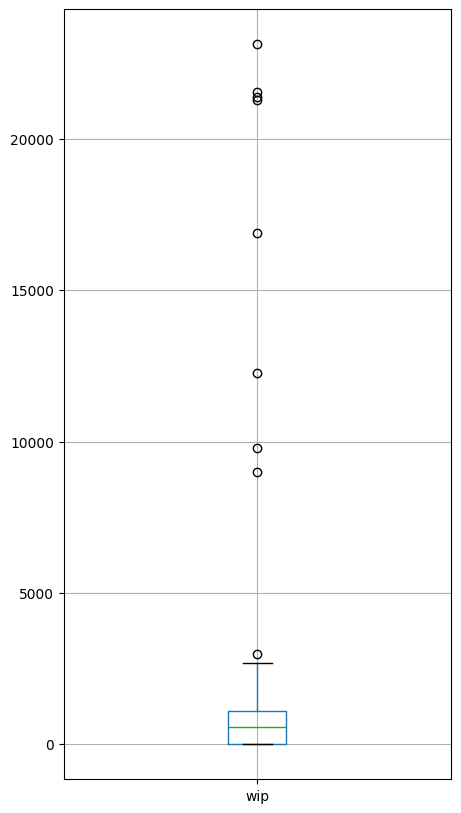

In [37]:
plt.subplots(figsize=(5,10))
data.boxplot(column=['wip'])

In [38]:
# Convertir a numérico
data['actual_productivity'] = pd.to_numeric(data['actual_productivity'], errors='coerce')

# Verificar la cantidad de valores NaN después de la conversión
print("Cantidad de valores NaN después de la conversión:", data['actual_productivity'].isna().sum())

# Opcional: Eliminar filas con valores NaN
data_clean = data.dropna(subset=['actual_productivity'])

# Verificar la cantidad de filas después de eliminar valores NaN
print("Cantidad de filas después de eliminar valores NaN:", len(data_clean))

Cantidad de valores NaN después de la conversión: 36
Cantidad de filas después de eliminar valores NaN: 1161


In [41]:
data_clean.to_csv('datos_limpios0.csv',index=False)